In [169]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from magpylib.source.magnet import Cylinder
import magpylib as magpy

# create collection of two magnets
s1 = Cylinder(mag=[0,0,1280], dim=[72,13])
s2 = Cylinder(mag=[0,0,-1280], dim=[32.5,13])
c = magpy.Collection(s1,s2)

# create positions
xs = np.linspace(-50,50,200)
zs = np.linspace(-50,50,200)
ys = np.linspace(-50,50,200)
posis = [[x,0,z] for z in zs for x in xs]
posis_y = [[x,y,0] for y in ys for x in xs]

# calculate field and amplitude
B = [c.getB(pos) for pos in posis]
Bs = np.array(B).reshape([200,200,3]) #reshape
Bamp = np.linalg.norm(Bs,axis=2)

B_y = [c.getB(pos) for pos in posis_y]
Bs_y = np.array(B_y).reshape([200,200,3]) #reshape
Bamp_y = np.linalg.norm(Bs_y,axis=2)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


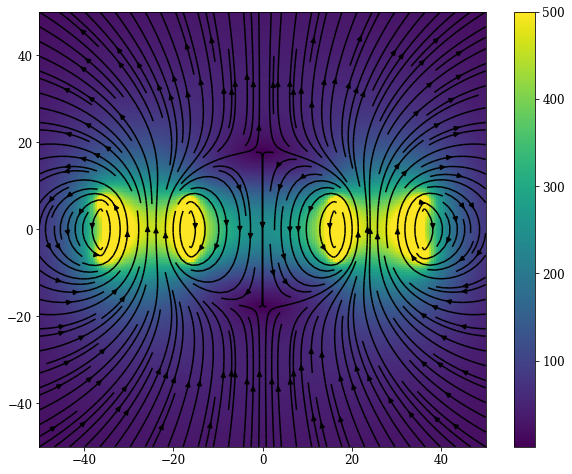

In [170]:
# define figure with a 2d and a 3d axis
fig = plt.figure(figsize=(10,8))
ax2 = fig.add_subplot(111)
'''
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# add displaySystem on ax1
magpy.displaySystem(c,subplotAx=ax1,suppress=True)
ax1.view_init(elev=45)
'''
# amplitude plot on ax2
X,Z = np.meshgrid(xs,zs)
pc = ax2.pcolor(xs,zs,Bamp,cmap='viridis', vmax=500)
plt.colorbar(pc)

# plot field lines on ax2
U,V = Bs[:,:,0], Bs[:,:,2]
ax2.streamplot(X,Z,U,V,color='k',density=2)

plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')

#display
plt.show()

In [171]:
positions = np.arange(-1,1.1,0.1)
z_field1 = []
z_field2 = []
z_field3 = []
for i in positions:
    z_field1.append(c.getB([i,0,0])[2])
    
for i in positions:
    z_field2.append(c.getB([0,0,i])[2])
'''
for i in positions:
    z_field3.append(c.getB([i,0,10])[2])
'''

'\nfor i in positions:\n    z_field3.append(c.getB([i,0,10])[2])\n'

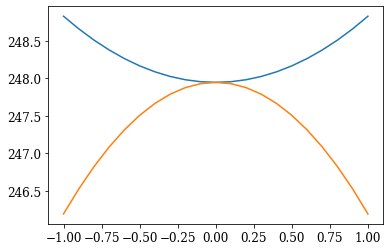

In [172]:
plt.plot(positions, np.absolute(z_field1))
plt.plot(positions, np.absolute(z_field2))

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from magpylib.source.magnet import Cylinder
import magpylib as magpy

# create collection of two magnets
s1 = Cylinder(mag=[0,0,1280], dim=[72,13], pos=[0,0,-10.5])
s2 = Cylinder(mag=[0,0,-1280], dim=[32.5,13], pos=[0,0,-10.5])
s3 = Cylinder(mag=[0,0,1280], dim=[72,13], pos=[0,0,10.5])
s4 = Cylinder(mag=[0,0,-1280], dim=[32.5,13], pos=[0,0,10.5])
c = magpy.Collection(s1,s2,s3,s4)

# create positions
xs = np.linspace(-50,50,200)
zs = np.linspace(-50,50,200)
posis = [[x,0,z] for z in zs for x in xs]

# calculate field and amplitude
B = [c.getB(pos) for pos in posis]
Bs = np.array(B).reshape([200,200,3]) #reshape
Bamp = np.linalg.norm(Bs,axis=2)

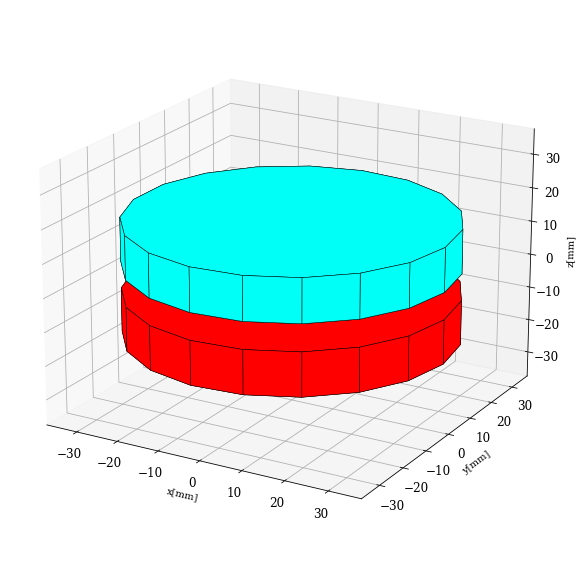

In [264]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111,projection='3d')
magpy.displaySystem(c,subplotAx=ax1,suppress=True)
ax1.view_init(elev=20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


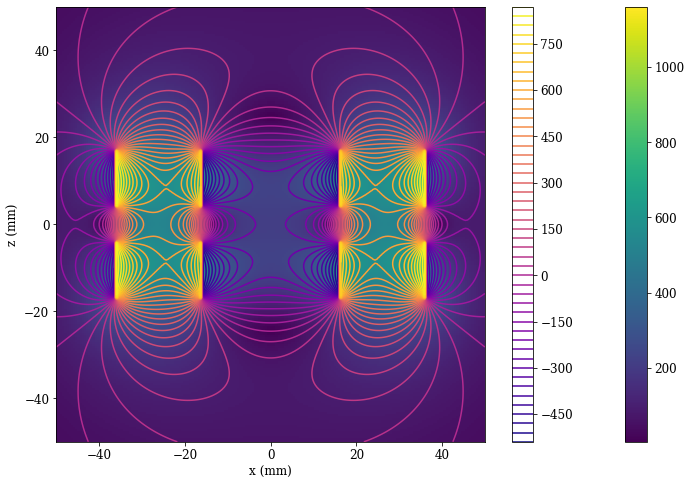

In [252]:
# define figure with a 2d and a 3d axis
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(111)
'''
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# add displaySystem on ax1
magpy.displaySystem(c,subplotAx=ax1,suppress=True)
ax1.view_init(elev=45)
'''
# amplitude plot on ax2
X,Z = np.meshgrid(xs,zs)
#pc1 = ax1.pcolor(xs,zs,Bamp,cmap='viridis')
pc2 = ax2.pcolor(xs,zs,Bamp,cmap='viridis')
plt.colorbar(pc2)

# plot field lines on ax2
U,V = Bs[:,:,0], Bs[:,:,2]
#ax2.streamplot(X,Z,U,V,color='k',density=2)
cc = ax2.contour(X,Z,V, levels=50, cmap='plasma')
plt.colorbar(cc)

ax2.set_ylabel('z (mm)', fontsize=12)
ax2.set_xlabel('x (mm)', fontsize=12)

'''
ax2.axhline(y=0, color='w')
ax2.axhline(y=10, color='w')
'''

#plt.title('Magnetic field simulation for 80mm seperation')

#ax2.axhline(y=11.5, color='w')

plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')
'''
# Create a Rectangle patch
rect1 = patches.Rectangle((-36,5.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect2 = patches.Rectangle((-36,-18.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect3 = patches.Rectangle((16.25,5.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect4 = patches.Rectangle((16.25,-18.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
# Add the patch to the Axes
ax2.add_patch(rect1)
ax2.add_patch(rect2)
ax2.add_patch(rect3)
ax2.add_patch(rect4)
'''
#display
#plt.show()
plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/field_simulation.pdf')

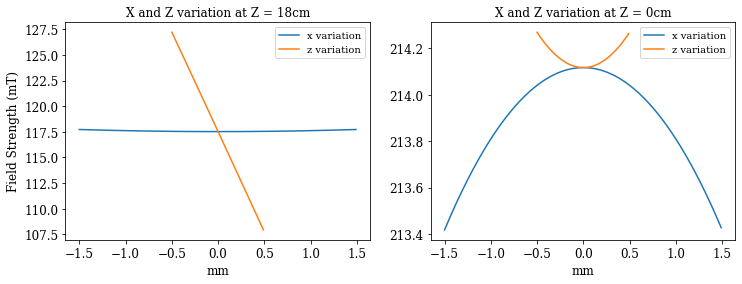

In [255]:
xpositions = np.arange(-1.5,1.5,0.01)
zpositions = np.arange(-0.5,0.5,0.01)
z_field1 = []
z_field2 = []
z_field3 = []
z_field4 = []

for i in xpositions:
    z_field1.append(c.getB([i,0,18])[2])

for i in zpositions:
    z_field2.append(c.getB([0,0,18+i])[2])
    
for i in xpositions:
    z_field3.append(c.getB([i,0,0])[2])
    
for i in zpositions:
    z_field4.append(c.getB([0,0,i])[2])

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
plt.title('X and Z variation at Z = 18cm')
ax1.plot(xpositions, np.absolute(z_field1), label='x variation')
ax1.plot(zpositions, np.absolute(z_field2), label='z variation')
plt.legend()
ax1.set_ylabel('Field Strength (mT)', fontsize=12)
ax1.set_xlabel('mm', fontsize=12)

ax2 = fig.add_subplot(122)
plt.title('X and Z variation at Z = 0cm')
ax2.plot(xpositions, np.absolute(z_field3), label='x variation')
ax2.plot(zpositions, np.absolute(z_field4), label='z variation')
plt.legend()
#ax2.set_ylabel('Field Strength (mT)', fontsize=12)
ax2.set_xlabel('mm', fontsize=12)

plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/field_variation.pdf')

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from magpylib.source.magnet import Cylinder
import magpylib as magpy

# create collection of two magnets
s1 = Cylinder(mag=[0,0,-1280], dim=[72,13], pos=[0,0,13])
s2 = Cylinder(mag=[0,0,1280], dim=[32.5,13], pos=[0,0,13])
s3 = Cylinder(mag=[0,0,1280], dim=[72,13], pos=[0,0,0])
s4 = Cylinder(mag=[0,0,-1280], dim=[32.5,13], pos=[0,0,0])
s5 = Cylinder(mag=[0,0,-1280], dim=[72,13], pos=[0,0,-13])
s6 = Cylinder(mag=[0,0,1280], dim=[32.5,13], pos=[0,0,-13])
c = magpy.Collection(s1,s2,s3,s4,s5,s6)

# create positions
xs = np.linspace(-50,50,200)
zs = np.linspace(-50,50,200)
posis = [[x,0,z] for z in zs for x in xs]

# calculate field and amplitude
B = [c.getB(pos) for pos in posis]
Bs = np.array(B).reshape([200,200,3]) #reshape
Bamp = np.linalg.norm(Bs,axis=2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


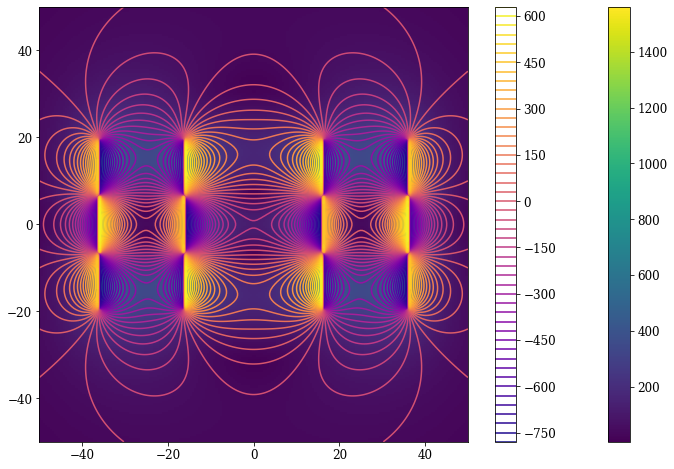

In [99]:
# define figure with a 2d and a 3d axis
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(111)
'''
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

# add displaySystem on ax1
magpy.displaySystem(c,subplotAx=ax1,suppress=True)
ax1.view_init(elev=45)
'''
# amplitude plot on ax2
X,Z = np.meshgrid(xs,zs)
pc = ax2.pcolor(xs,zs,Bamp,cmap='viridis')
plt.colorbar(pc)

# plot field lines on ax2
U,V = Bs[:,:,0], Bs[:,:,2]
#ax2.streamplot(X,Z,U,V,color='k',density=2)
cc = ax2.contour(X,Z,V, levels=50, cmap='plasma')
plt.colorbar(cc)

#ax2.axhline(y=11.5, color='w')

plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')
'''
# Create a Rectangle patch
rect1 = patches.Rectangle((-36,5.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect2 = patches.Rectangle((-36,-18.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect3 = patches.Rectangle((16.25,5.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
rect4 = patches.Rectangle((16.25,-18.5),19.75,13,linewidth=1,edgecolor='w',facecolor='none')
# Add the patch to the Axes
ax2.add_patch(rect1)
ax2.add_patch(rect2)
ax2.add_patch(rect3)
ax2.add_patch(rect4)
'''
#display
plt.show()

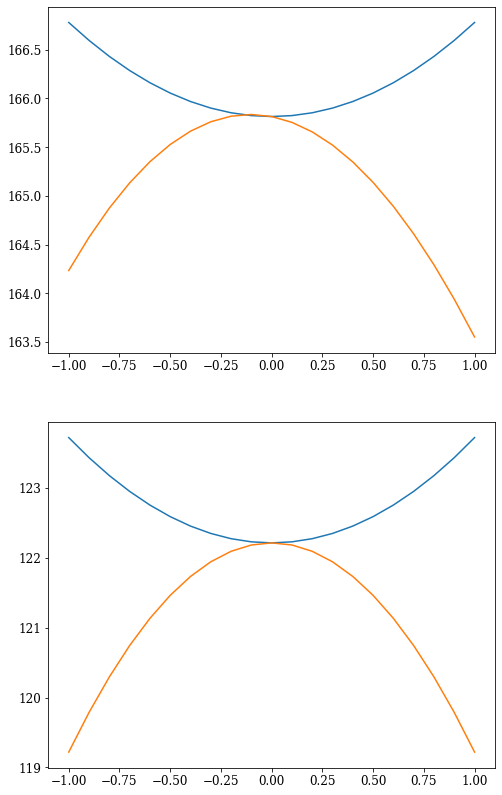

In [106]:
positions = np.arange(-1,1.1,0.1)
z_field1 = []
z_field2 = []
z_field3 = []
z_field4 = []

for i in positions:
    z_field1.append(c.getB([i,0,16.5])[2])

for i in positions:
    z_field2.append(c.getB([0,0,16.5+i])[2])
    
for i in positions:
    z_field3.append(c.getB([i,0,0])[2])
    
for i in positions:
    z_field4.append(c.getB([0,0,i])[2])

fig = plt.figure(figsize=(8,14))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(positions, np.absolute(z_field1))
ax1.plot(positions, np.absolute(z_field2))
ax2.plot(positions, np.absolute(z_field3))
ax2.plot(positions, np.absolute(z_field4))